In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.graph_objs as go
import plotly.express as px


# Desactivar advertencias de tipo FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)



In [19]:
df = pd.read_excel('deflactacion_corrientes.xlsx')
df = df.drop('Unnamed: 0',axis=1)
df.set_index('fecha',inplace=True)

In [20]:
#Asignacion de meses
df['meses'] = df.index.month

In [21]:
#Lista de columnas
columnas = list(df.columns)
columnas.remove('id_region_indec')
columnas.remove('id_provincia_indec')
columnas.remove('meses')

Considero que este grafico ayuda a estudiar las estacionalidades de cada categoria del supermercado, ya que vemos a lo largo del año, en que mes se vende mas cada cosa

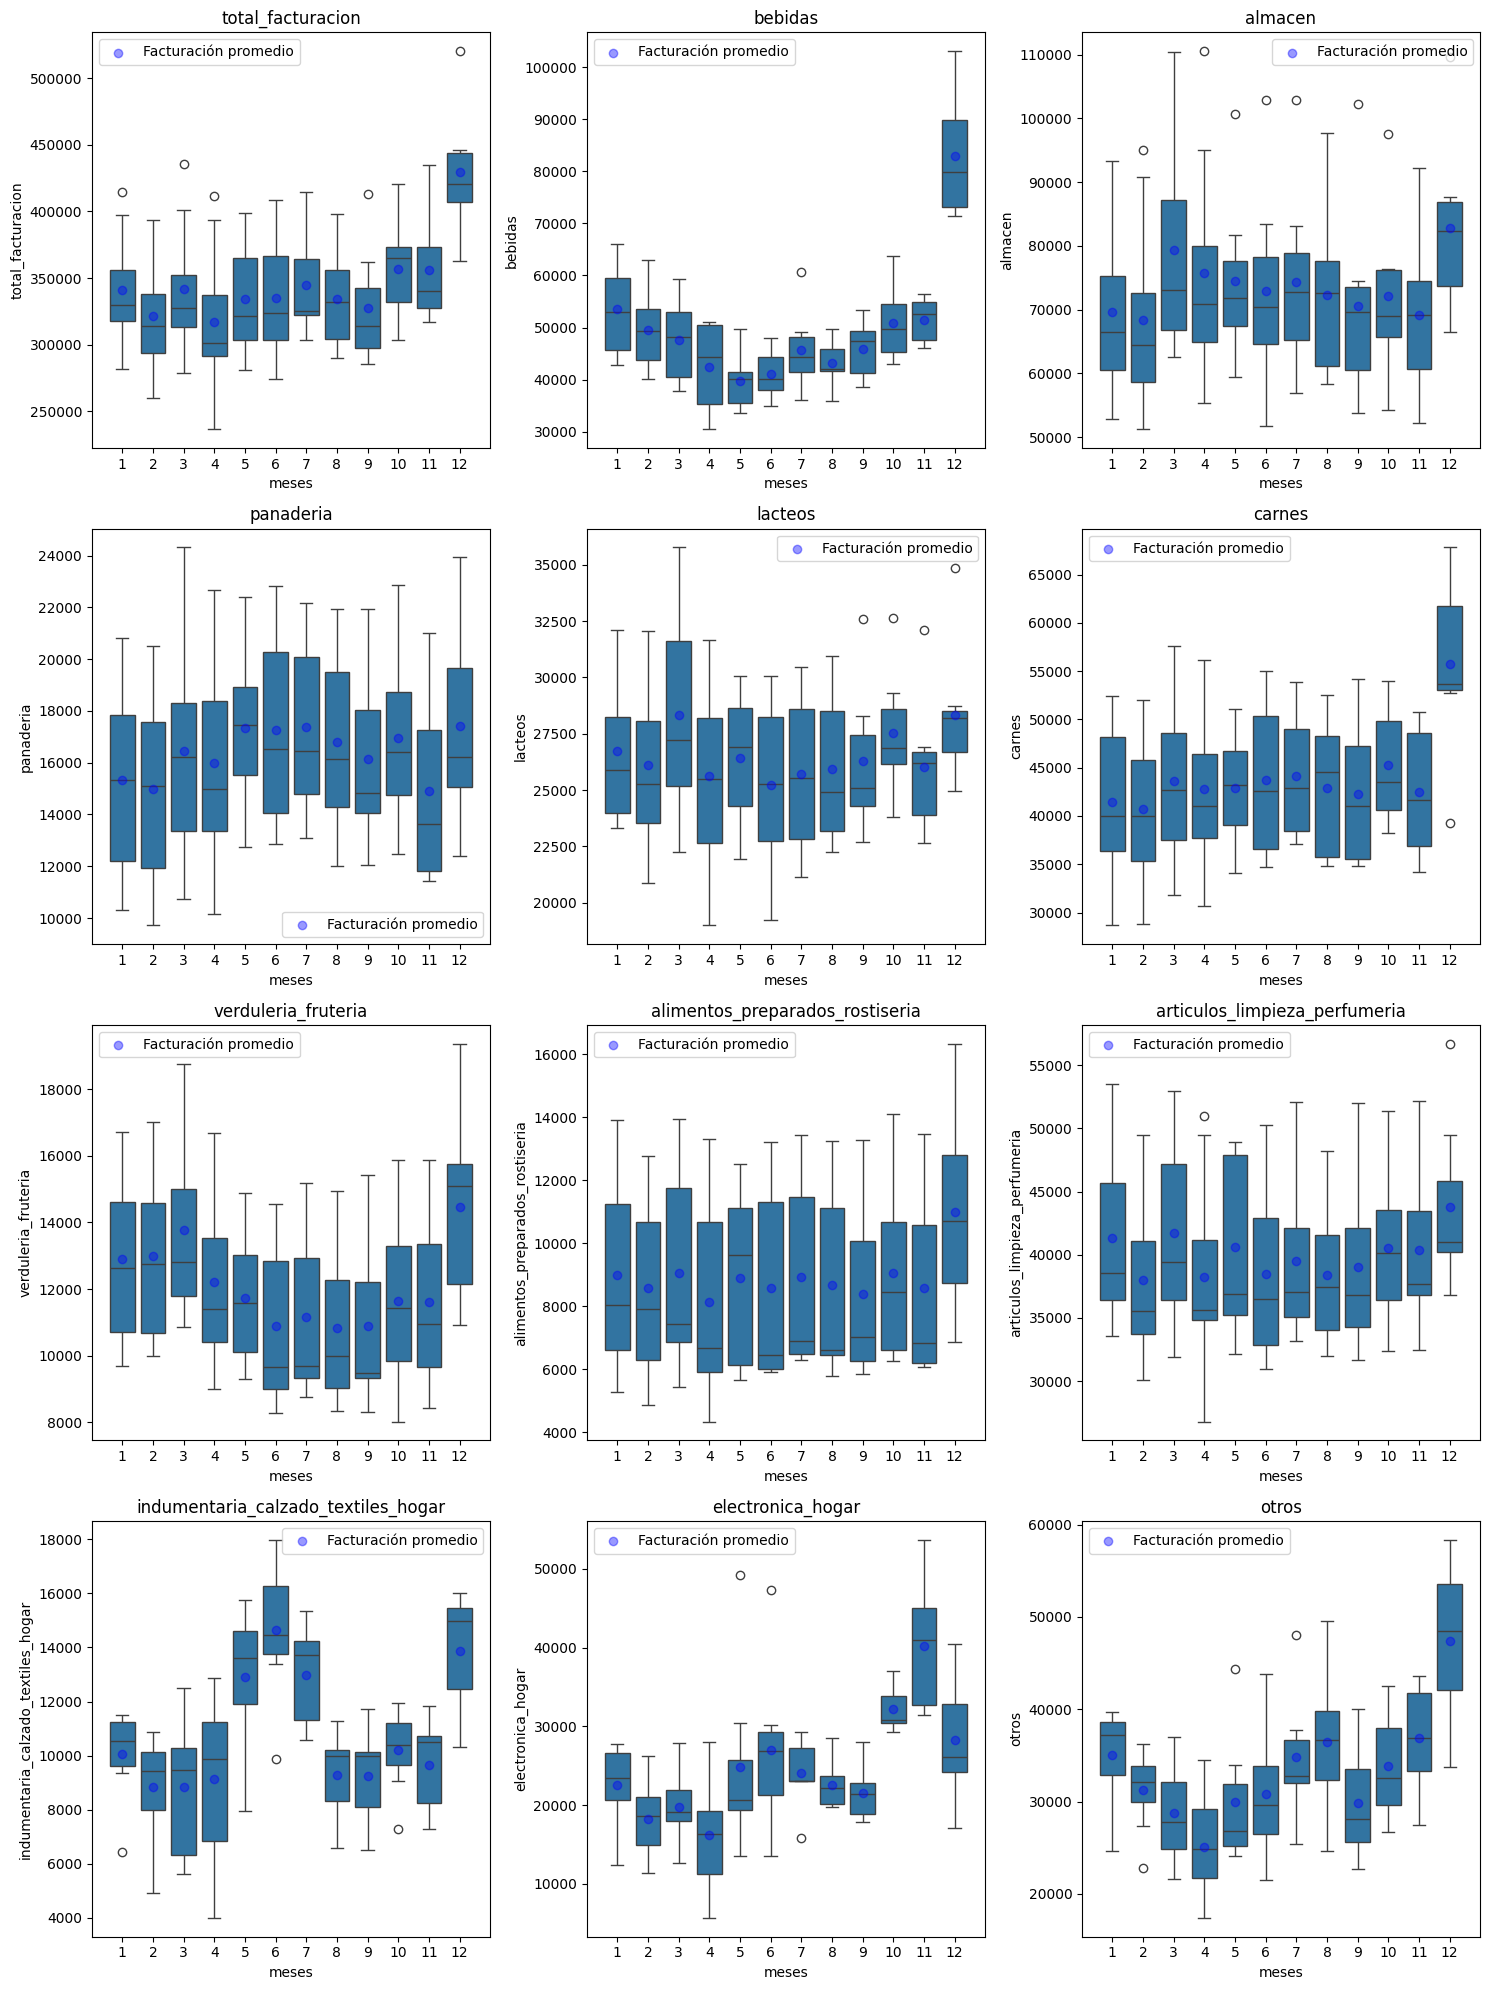

In [22]:
#MESES UNICOS
months = np.unique(df.index.month)


# Crear figura y ejes
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for i, colum in enumerate(columnas):

    #Acumula los datos por mes de cada columna
    acum_data = pd.DataFrame(columns=[colum,'meses'])

    #Lista de promedios por mes
    lista_promedios = []

    #Busqueda de datos por mes
    for month in months:

        data = df[[colum,'meses']][df['meses'] == month]

        lista_promedios.append(data[colum].mean())

        #Grafico de boxplot
        acum_data = pd.concat([acum_data,data]) 
        
    # Gráfico de boxplot
    sns.boxplot(ax=axes[i], x=acum_data['meses'], y=acum_data[colum])
    axes[i].set_title(colum)
    axes[i].scatter(x=np.arange(0, 12), y=lista_promedios, color='blue', alpha=0.4, zorder=5, label="Facturación promedio")
    axes[i].legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

Estudiaremos la correlaccion que existe de cada serie con las demas, con el objetivo de estudiar causalidades o relaciones fuertes de venta. Usaremos un periodo anual, es decir, cada punto representara una correlaccion de 12 valores con otros 12 valores.

In [23]:
#Buscamos los años
years = pd.unique(df.index.year)


#Acumulador de datos
mtz_corr = pd.DataFrame(columns=columnas)

for year in years:

    #La var columna es la lista de antes generada especifcamente para los valores
    data_year = df[columnas][df.index.year == year]

    #CORRELACCION POR AÑO
    corr_for_year = data_year.corr()
    corr_for_year['anio'] = year

    #Concatenamos los df's
    mtz_corr = pd.concat([mtz_corr,corr_for_year])


mtz_corr

,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronica_hogar,otros,anio
total_facturacion,1.000000,0.924407,0.406038,0.624657,0.780630,0.908773,0.762690,0.953892,0.864956,0.587273,0.560218,0.911193,2017.0
bebidas,0.924407,1.000000,0.347175,0.352655,0.840421,0.888955,0.935080,0.916620,0.871958,0.482996,0.312098,0.878517,2017.0
almacen,0.406038,0.347175,1.000000,0.513012,0.226705,0.637266,0.247334,0.377422,0.297599,0.635031,-0.212906,0.097717,2017.0
panaderia,0.624657,0.352655,0.513012,1.000000,0.357067,0.643105,0.154966,0.625642,0.400718,0.399504,0.445470,0.446288,2017.0
lacteos,0.780630,0.840421,0.226705,0.357067,1.000000,0.717170,0.887240,0.807487,0.764868,0.163649,0.315941,0.708705,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
alimentos_preparados_rostiseria,0.633856,0.311921,0.797670,0.986851,0.587969,0.585583,0.602187,1.000000,0.546542,0.327293,0.913763,0.164078,2024.0
articulos_limpieza_perfumeria,0.975786,0.964248,0.091507,0.408867,0.998704,-0.283437,0.714379,0.546542,1.000000,-0.104509,0.819134,0.914226,2024.0
indumentaria_calzado_textiles_hogar,-0.208161,-0.276262,0.011133,0.337814,-0.074504,0.108044,-0.534237,0.327293,-0.104509,1.000000,0.047392,-0.332474,2024.0
electronica_hogar,0.891503,0.655970,0.633074,0.848222,0.845010,0.311482,0.816478,0.913763,0.819134,0.047392,1.000000,0.534183,2024.0


Haremos la grafica de la correlaccion

In [24]:
columnas_mtz = mtz_corr.columns


for column in columnas:

    #Buscamos la correlaccion de cada categoria con las demas, y borramos la 
    #identidad, ya que presenta una correlaccion de la serie consigo misma.
    data = mtz_corr[mtz_corr.index == column].drop(column,axis=1)


    #Columnas de los datos a plotear
    columns_data = list(data.columns)

    #Eliminamos la columna de años
    columns_data.remove('anio')

    
    # Crear una figura
    fig = go.Figure()


    for column_data in columns_data:

        fig.add_trace(go.Scatter(x=pd.unique(data['anio']), y=data[column_data], mode='lines', name=column_data))

  # Configurar layout
    fig.update_layout(
        title=f'Correlación de {column}  con las demás categorías',
        xaxis_title='Año',
        yaxis_title='Correlación',
        hovermode='x unified'
    )
    fig.show()

